In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import string
import re

from nltk.corpus import stopwords
from string import punctuation


%matplotlib inline

In [2]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [56]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [3]:
df = pd.read_csv('news.csv', sep=',')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df = df.drop(['Unnamed: 0', 'title'], axis=1)

In [8]:
def clean_text(text):
    '''This function removes the puncuation from text and 
     split the sentence in tokens. Then reduces the character of tokens by Stemming
    '''
    text = ''.join([word for word in text if word not in punctuation])
    text = ''.join((word for word in text if not word.isdigit()))
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

def len_text(text):
    '''This function determine length of text after removing the white space from the text'''
    
    text = len(text)- text.count(' ')
    return text

In [9]:
#apply the fuction in each text
df['clean_text'] = df['text'].apply(lambda x : clean_text(x))

In [10]:
df['length_text'] = df['text'].apply(lambda x: len_text(x))

In [11]:
df.head()

,text,label,clean_text,length_text
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, shillman, journal, fellow...",6221
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[googl, pinterest, digg, linkedin, reddit, stu...",2201
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[us, secretari, state, john, f, kerri, said, m...",2121
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[, kayde, king, kaydeek, novemb, the, lesson, ...",2257
4,It's primary day in New York and front-runners...,REAL,"[it, primari, day, new, york, frontrunn, hilla...",1534


In [13]:
df.tail(2)

,text,label,clean_text,length_text
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"[addi, ababa, ethiopia, presid, obama, conven,...",5899
6334,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL,"[jeb, bush, is, suddenli, attack, trump, here,...",4018


### Feature Engineering

In [17]:
df[df['label'] =='REAL']['length_text'].describe()

count     3171.000000
mean      4441.141596
std       3643.083480
min         37.000000
25%       2294.500000
50%       3926.000000
75%       5730.500000
max      36494.000000
Name: length_text, dtype: float64

In [18]:
df[df['label'] =='FAKE']['length_text'].describe()

count     3164.000000
mean      3443.098925
std       4725.601932
min          0.000000
25%       1068.000000
50%       2132.000000
75%       4235.750000
max      94476.000000
Name: length_text, dtype: float64

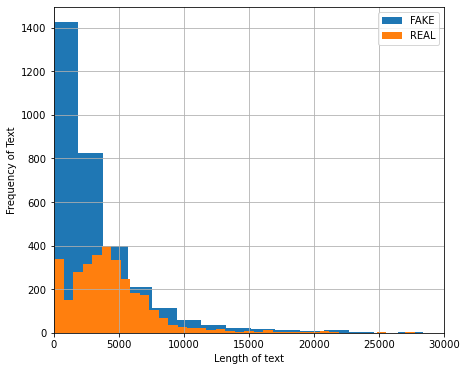

In [60]:
plt.figure(figsize =(7,6))
plt.hist(df[df['label']=='FAKE']['length_text'], bins = 50, label = 'FAKE')
plt.hist(df[df['label']=='REAL']['length_text'], bins = 50, label = 'REAL')
plt.grid(True)
plt.xlabel('Length of text')
plt.ylabel('Frequency of Text')
plt.xlim(0,30000)
plt.legend()
plt.show()

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
x_tfidf = tfidf_vect.fit_transform(df['text'])
X_features = pd.concat([df['length_text'],pd.DataFrame(x_tfidf.toarray())],axis=1)

In [57]:
X_features.head(2)

,length_text,0,1,2,3,4,5,6,7,8,...,56486,56487,56488,56489,56490,56491,56492,56493,56494,56495
0,6221,0.012309,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2201,0.000000,0.02416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Applying Machine Learning Classifier

### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_features, df['label'], test_size=0.2)

In [28]:
rf = RandomForestClassifier(n_estimators = 50, max_depth=20, n_jobs=-1)
model = rf.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict[:5]

array(['REAL', 'REAL', 'FAKE', 'REAL', 'FAKE'], dtype=object)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [30]:
print(classification_report(y_test, y_predict))
print()
print('Accuracy: ',accuracy_score(y_test, y_predict))
print()
print('Confusion Matrix ', confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

        FAKE       0.83      0.89      0.86       615
        REAL       0.89      0.83      0.86       652

    accuracy                           0.86      1267
   macro avg       0.86      0.86      0.86      1267
weighted avg       0.86      0.86      0.86      1267


Accuracy:  0.8587213891081295

Confusion Matrix  [[549  66]
 [113 539]]


### Naive Bayes Classification

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
nb = MultinomialNB()
model = nb.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict[:5]

array(['REAL', 'REAL', 'REAL', 'REAL', 'REAL'], dtype='<U4')

In [43]:
print(classification_report(y_test, y_predict))
print()
print('Accuracy: ',accuracy_score(y_test, y_predict))
print()
print('Confusion Matrix ', confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

        FAKE       0.99      0.30      0.46       615
        REAL       0.60      1.00      0.75       652

    accuracy                           0.66      1267
   macro avg       0.80      0.65      0.61      1267
weighted avg       0.79      0.66      0.61      1267


Accuracy:  0.6606156274664562

Confusion Matrix  [[186 429]
 [  1 651]]


### Gradient Boosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gb = GradientBoostingClassifier()
model = gb.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict[:5]

array(['REAL', 'REAL', 'FAKE', 'REAL', 'FAKE'], dtype=object)

In [54]:
gb

GradientBoostingClassifier()

In [55]:
print(classification_report(y_test, y_predict))
print()
print('Accuracy: ',accuracy_score(y_test, y_predict))
print()
print('Confusion Matrix ', confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

        FAKE       0.90      0.91      0.90       615
        REAL       0.92      0.90      0.91       652

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267


Accuracy:  0.9060773480662984

Confusion Matrix  [[561  54]
 [ 65 587]]
